# Usando o Pandas
## Importando e Usando suas funções básicas

In [1]:
import pandas as pd # importando o pandas, já instalado na máquina com o pip3
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('../arquivos/ratings.csv') # lendo o arquivo csv com o pandas
# dois pontos serve para subir um nível na árvore de arquivos

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
notas = pd.read_csv('../arquivos/ratings.csv') 
# colocando dentro de uma variável e lendo apenas as top 5 linhas
notas.head()
# 5 é o padrão, pode ser usado qualquer valor dentro dos parênteses

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape # mostra o formato do dataframe em linhas e colunas

(100836, 4)

In [5]:
notas.columns = ['usuárioId', 'filmeId', 'nota', 'momento'] # alterando títulos das colunas
notas.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas['nota'] # mostrando apenas uma coluna específica

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [7]:
notas['nota'].head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [8]:
notas['nota'].unique() # mostra os valores que apareceram pelo menos uma vez na coluna

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas['nota'].value_counts() # mostra, conta e ordena todos os valores que apareceram na coluna

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
print('Média: ', notas['nota'].mean()) # média dos valores dessa série (coluna)
print('Mediana: ', notas.nota.median()) # mediana, valor que divide em duas metades, os valores mais vistos dos menos vistos
# se não usar o print é exibido apenas o segundo comando
# pode-se usar f strings

Média:  3.501556983616962
Mediana:  3.5


In [11]:
# outra forma de acessar esses valores é através da função describe
notas.nota.describe()
# exibe valores como total de dados, média, max, min, mediana (50%)
# e ainda valor de corte (25%) => 1/4 das notas são inferiores a 3
# (75%) => 1/4 das notas são maiores que 4

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [12]:
notas.nota.head() # .nota é uma outra maneira de chamar a série ['nota'] 

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

## Visualizando os Primeiros Gráficos

<AxesSubplot:>

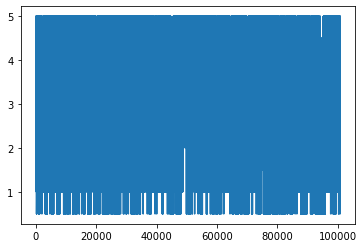

In [13]:
notas.nota.plot() # gráfico padrão da função

<AxesSubplot:ylabel='Frequency'>

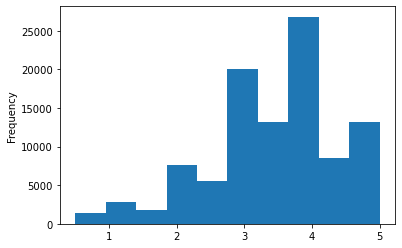

In [14]:
notas.nota.plot(kind='hist') # plota um gráfico, dessa vez do tipo histograma

<AxesSubplot:xlabel='nota'>

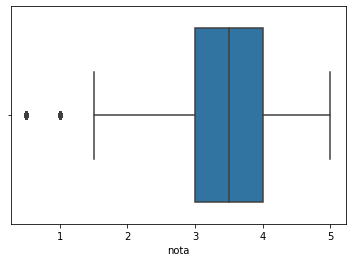

In [15]:
import seaborn as sns # módulo seaborn instalado com pip3

sns.boxplot(x=notas.nota) # gráfico do tipo caixa do seaborn
# esse gráfico mostra que metade das notas dadas estão entre 3 e 4
# a mediana está entre esses valores, 3.5
# as linhas laterais representam os quartis, o comprimento é a distribuição
# do lado esquederdo (maior comprimento), entre 1.5 e 3 tivemos 1/4 das notas
# os pontos representam notas que tiveram pouca representação

## Utilizando Outro Conjunto de Dados

In [16]:
filmes = pd.read_csv('../arquivos/movies.csv') # usando outro arquivo
filmes.columns = ['filmeId', 'titulo', 'generos'] # não é indicado usar acentuação para facilitar usar as séries
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
# função query, seleciona as linhas em que a coluna tem o valor desejado
notas.query('filmeId == 1') # nesse caso foi selecionado linhas em que a coluna fimeId tem valor = 1

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


## Removendo colunas

In [18]:
filtro = notas.query('filmeId == 1')
filtro.drop(columns='momento') # caso queira mais de uma coluna, separar os valores por vírgula e usar colchetes

,usuárioId,filmeId,nota
0,1,1,4.0
516,5,1,4.0
874,7,1,4.5
1434,15,1,2.5
1667,17,1,4.5
...,...,...,...
97364,606,1,2.5
98479,607,1,4.0
98666,608,1,2.5
99497,609,1,3.0


## Selecionando uma Coluna Específica
* pode-se aplicar ainda uma função a essa query
* no caso, aplicaremos a média

In [19]:
print(notas.query('filmeId == 1').nota) # nesse caso, além da seleção acima, foi pedido para mostrar apenas a série nota
print(f'{notas.query("filmeId == 1").nota.mean():.2f}') # aqui pedimos a média da série nota, dos filmes com id = 1
# utilizando f strings com 2 casas decimais

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64
3.92


## Calculando a média por filme

### Função Groupby

* a função grupby agrega valores iguais de uma mesma coluna.  
* depois é possível aplicar uma função em cima desse filtro, por exemplo a média

In [20]:
medias_por_filme = notas.groupby('filmeId').nota.mean() # também aceito no formato notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

# Plotando gráficos

## Histograma e Boxplot
O histograma também é conhecido como "distribuição de frequências", e é representado em um gráfico de colunas ou de barras a partir de um conjunto de dados previamente tabulado e dividido em classes (uniformes ou não uniformes).  
  
Já o boxplot, também conhecido como "diagrama de caixa", é um método alternativo para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a média de valores.

<AxesSubplot:ylabel='Frequency'>

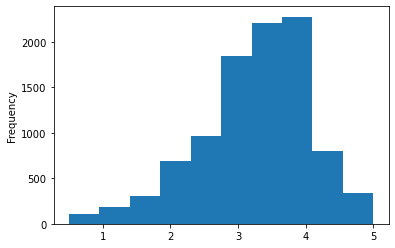

In [21]:
medias_por_filme.plot(kind = 'hist') # gráfico do tipo histograma

<AxesSubplot:xlabel='nota'>

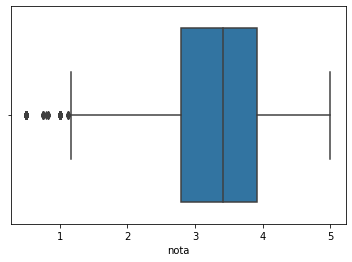

In [22]:
sns.boxplot(x=medias_por_filme) # gŕafico box no seaborn
# informar o eixo de plotagem, x=horizontal, y=vertical, evita mensagem de aviso do seaborn

In [23]:
medias_por_filme.describe() # mostrando os números exatos do gráfico acima

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

## Histograma no seaborn

C:\Users\elton\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

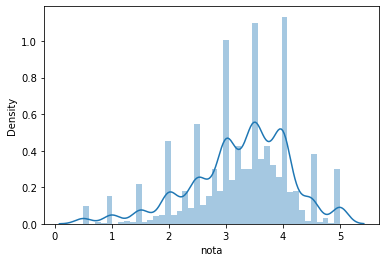

In [24]:
sns.distplot(medias_por_filme) # o seaborn apresenta também uma curva de aproximação
# mas esta é uma função em desuso e será substituida pelas versões displot e histplot

### Funções displot e histplot

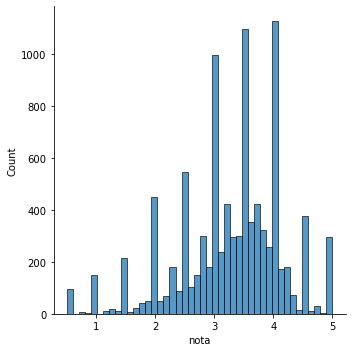

In [25]:
sns.displot(medias_por_filme)

<AxesSubplot:xlabel='nota', ylabel='Count'>

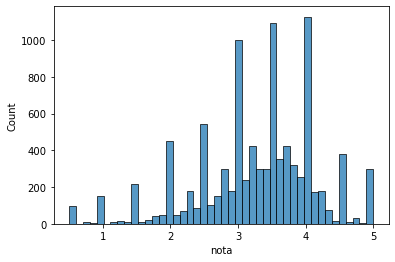

In [26]:
sns.histplot(medias_por_filme)

### Definindo número de separações do histograma
* note que o histograma do seaborn é diferente do pandas

<AxesSubplot:xlabel='nota', ylabel='Count'>

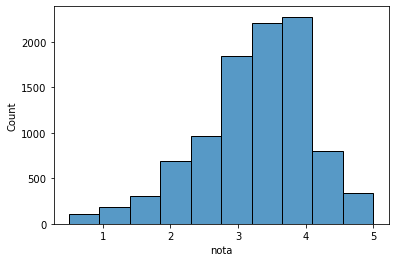

In [27]:
sns.histplot(medias_por_filme, bins=10) # ajustado mesmo número de separações do pandas

## Usando Matplot
```import matplotlib.pyplot as plt```
* para facilitar o uso da biblioteca, foi importada no início do notebook
* o pandas e o seaborn rodam o matplot por baixo  

Text(0.5, 1.0, 'Histograma das médias dos filmes')

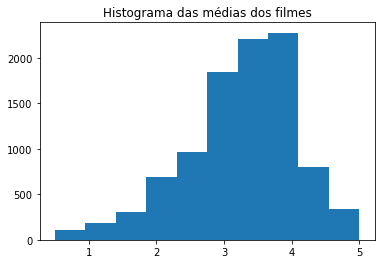

In [28]:
plt.hist(medias_por_filme) # plotando com o matplot
plt.title('Histograma das médias dos filmes') # dando um título ao gráfico

## Colocando boxplot do seaborn na vertical e alterando o tamanho no matplot

<AxesSubplot:ylabel='nota'>

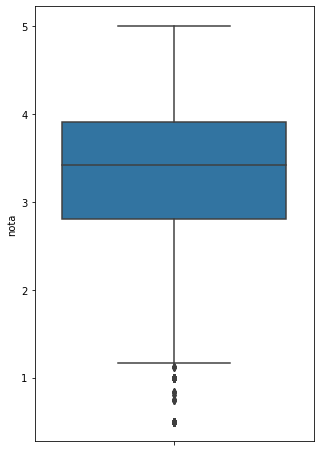

In [29]:
plt.figure(figsize=(5,8)) # tamanho alterado com matplot
sns.boxplot(y=medias_por_filme) # o padrão é horizontal, ou seja, eixo x

# Tipos de Variáveis

## Variáveis Categóricas Nominais e Ordinais

* As variáveis categóricas são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos.  Podem ser nominais ou ordinais.

* Categóricas nominais não existe uma ordem de grandeza.  

* Quando estamos trabalhando com categorias ordinais, existe uma ordenação entre as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.

## Variáveis Quantitativas 

* representa um valor
* contínua quando podem ser infinitos valores, inclusive casas decimais
* intervalar quando aumenta ou diminui num intervalo pré definido
    * ex: variável inteira só aumenta ou diminui no intervalo de 1 número inteiro

## Carregando Outro Conjunto de dados

In [30]:
tmdb = pd.read_csv('../arquivos/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Dados do tipo categoria nominal

In [31]:
tmdb.original_language.unique() # mostra as línguas disponíveis na coluna original language

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

### Variável do tipo quantitativa

In [32]:
tmdb.vote_average.unique() # mostra todas as notas médias que aparecem ao menos uma vez

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

# Transformando série em data frame

In [33]:
tmdb.original_language.value_counts() 
# essa função é considerada uma série, pois possui apenas uma coluna de valor

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ro       2
id       2
ar       2
cs       2
ta       2
is       1
te       1
nb       1
ky       1
ps       1
hu       1
el       1
tr       1
sl       1
xx       1
vi       1
no       1
af       1
pl       1
Name: original_language, dtype: int64

### Visualizando o index e os valores

In [34]:
# conforme pode ser visto
print(tmdb.original_language.value_counts().index)
print(tmdb.original_language.value_counts().values)

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ro', 'id', 'ar', 'cs', 'ta', 'is',
       'te', 'nb', 'ky', 'ps', 'hu', 'el', 'tr', 'sl', 'xx', 'vi', 'no', 'af',
       'pl'],
      dtype='object')
[4505   70   32   27   27   19   16   14   12   11   11    9    7    5
    4    4    3    3    2    2    2    2    2    1    1    1    1    1
    1    1    1    1    1    1    1    1    1]


### Transformando em Data Frame

In [35]:
# para transformar a seleção em um data frame usamos to_frame()
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


### Extraindo a coluna index, com reset_index
* Essa transformação é importante para conseguir trabalhar com gráficos no seaborn

In [36]:
tmdb.original_language.value_counts().to_frame().reset_index()
# é criado uma nova coluna e adicionado uma de contador

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


## Remodelando

In [37]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


## Visualizar Categorias

### Plotagem de Barras no Seaborn

* essa é uma plotagem de mais baixo nível, pois há a necessidade de realizar vários comandos para realizar a função

<AxesSubplot:xlabel='original_language', ylabel='total'>

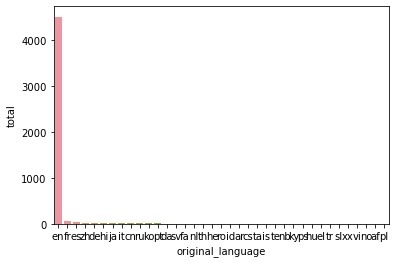

In [38]:
sns.barplot(x='original_language', y='total', data=contagem_de_lingua)

### Configurando Seaborn
* para plotagem de alguns gráficos, é necessário ter as versões mais recentes instaladas
* isso é facilmente verificado consultando a documentação

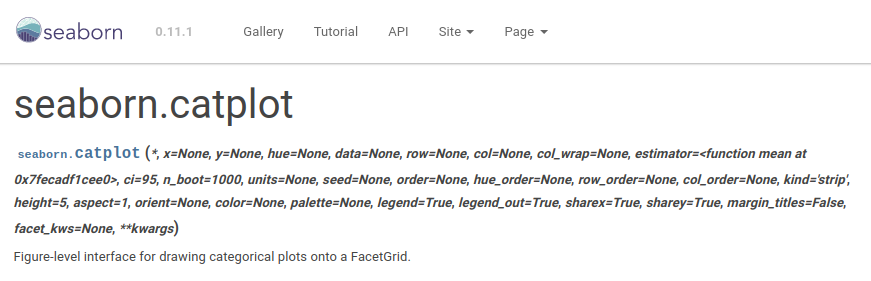

### Verificando e Instalando uma Nova Versão no Seaborn

In [39]:
sns.__version__

'0.11.0'

```!pip install seaborn=0.11.1```  
* caso seja necessário instalar uma nova versão e estiver no colab
* lembrar de restartar o runtime
* o código da instalação da nova versão deve ficar antes da importação
* a exclamação faz rodar o comando no terminal

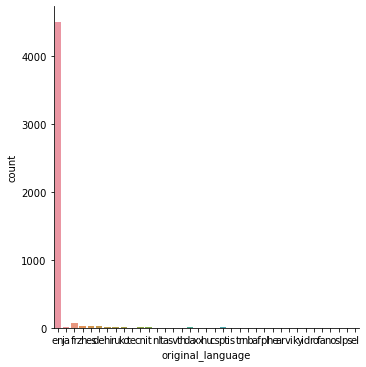

In [40]:
sns.catplot(x='original_language', kind='count', data=tmdb)

* essa é uma plotagem de alto nível, pois não há necessidade de rodar vários comando para chegar nesse resultado
* basta escolher qual a coluna do eixo x
* o kind, nesse caso, avisa que no eixo y será contado os valores do x
* é um tipo de plotagem equivalente ao barplot, porém mais simples de rodar

# Data Visualization parte 2
* no gráfico de barras acima, como há muita informação, não conseguimos passar uma mensagem
* assim como acontece com o gráfico de pizza
* repare na plotagem abaixo

([<matplotlib.patches.Wedge at 0x20f30144d90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

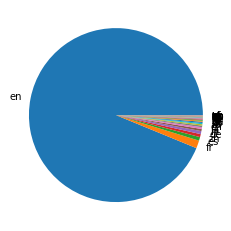

In [41]:
plt.pie(contagem_de_lingua.total, labels=contagem_de_lingua.original_language)
# plotagem usando pyplot do matplot, função pie, em português chamamos de pizza

* deve-se, portanto, saber a mensagem que queremos passar e achar um gráfico que possa passar essa informação
* podemos então separar esses dados
* compará-los de uma maneira mais adequada

In [42]:
total_por_lingua = tmdb.original_language.value_counts() # mostra a contagem de cada língua
total_geral = total_por_lingua.sum() # soma todas as categorias
total_de_ingles = total_por_lingua.loc['en'] # localiza (soma), tudo que encontrar da categoria en
total_do_resto = total_geral - total_de_ingles # subtrai total - categoria en
print(total_de_ingles, total_do_resto)

4505 298


## Criando um Data Frame com esses Valores
### Utilizando um dicionário

In [43]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [44]:
pd.DataFrame(dados) # transforma o dicionário criado em em Data Frame com o pandas

,lingua,total
0,ingles,4505
1,outros,298


### Sobrescrevendo a variável

In [45]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


### Plotando o Data Frame

<AxesSubplot:xlabel='lingua', ylabel='total'>

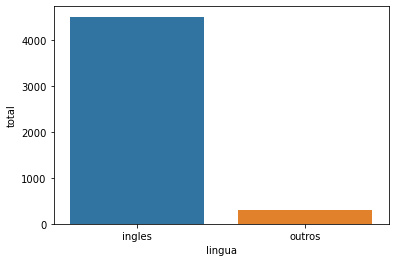

In [46]:
sns.barplot(x='lingua', y='total', data=dados)

* no gráfico acima pode-se visualizar a mensagem clara que há muitos mais filmes na língua inglesa, que em qualquer outra língua

# Data Visualization part 3
## Comparando os gráficos de barra e pizza

([<matplotlib.patches.Wedge at 0x20f302b9130>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

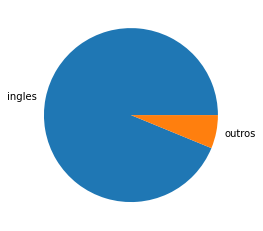

In [47]:
plt.pie(dados.total, labels=dados.lingua)

## Analisando as Outras Línguas
* para analizar as outras línguas devemos extrair o que não importa, nesse caso, a língua inglesa
* pegamos o data frame completo e usamos a query
* buscamos os filmes que a original_language não é inglês

In [48]:
tmdb.query("original_language != 'en'") # atenção ao uso correto das áspas

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

In [49]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
# contando apenas as colunas com outra língua
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ar     2
ro     2
cs     2
id     2
ta     2
el     1
hu     1
ky     1
te     1
pl     1
nb     1
af     1
is     1
ps     1
xx     1
no     1
vi     1
tr     1
sl     1
Name: original_language, dtype: int64

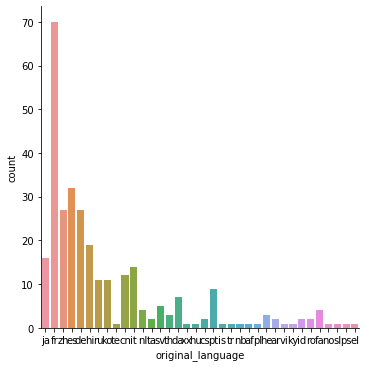

In [50]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
# variável grande, mas explícita
# e plotando usando o catplot
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles)

# Data Visualization part 4
## Redimensionando o tamanho do gráfico
* existem 2 tipos de funções no seaborn:
    * uma mais baixo nível, que é possível configurar manualmente como será a visualização nos eixo, como a bosxplot
    * e a de mais alto nível, em que o seaborn faz essa configuração
    * portanto, o catplot irá ignorar o comando figure(figsize)
    * verificando na documentação do catplot, existem parâmetros que podem ser configurados para essa finalidade:respectivamente

![](../arquivos/seaborn_catplot.png)

* parâmetros heigth e aspect (altura e aspecto, respectivamente)
* aspect=1 é para quadrado, usaremos 2 para retângulo

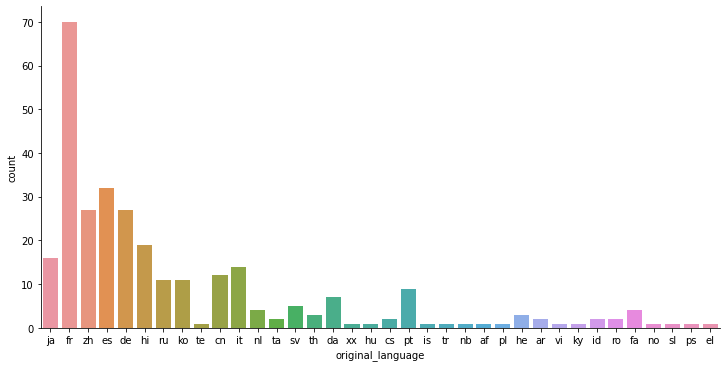

In [51]:
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles,
           aspect=2)

## Organizando Pela Maior Frequência de Aparição
* utilizamos o parâmetro **order**
* como já tínhamos organizado essa ordem em:

`total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()`
* contando apenas as colunas com outra língua
* usaremos o index dessa variável para organizar na ordem desejada

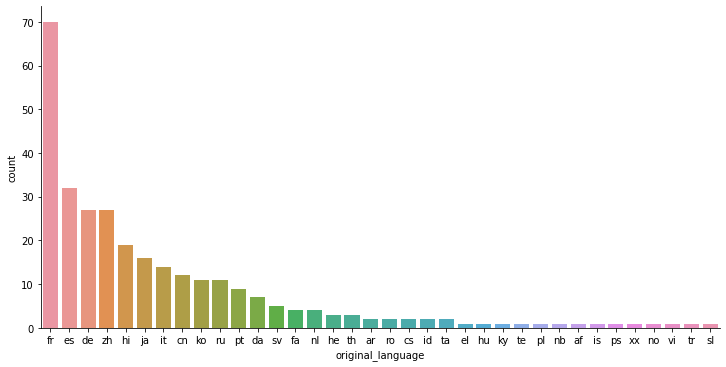

In [52]:
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles,
           aspect=2, order=total_por_lingua_de_outros_filmes.index)

## Trabalhando com a Paleta de Cores
* para um visual mais intuitivo, podemos usar uma paleta de cores que represente da maior para a menor frequêcia
* pesquisando na documentação **seaborn pallets**, existe um tipo **Sequential color palettes**
* usaremos a string 'mako', do parâmetro **palette**

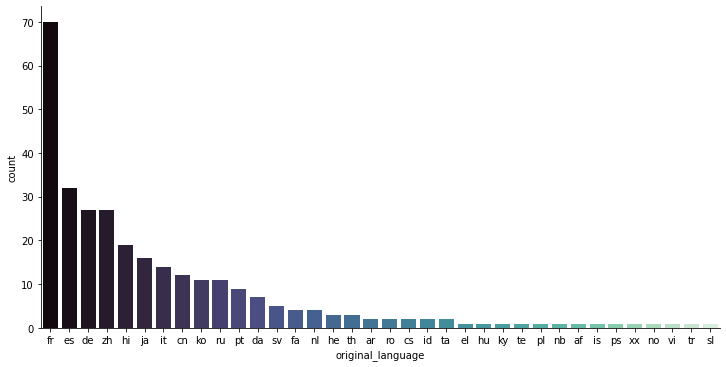

In [53]:
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles,
           aspect=2, order=total_por_lingua_de_outros_filmes.index,
           palette='mako')

## Outro Tipo de Gráfico
* Outro exemplo de gráfico que pode ser criado com essa biblioteca é o gráfico linear
* O dataframe utilizado para essa plotagem já está dentro da biblioteca do Seaborn

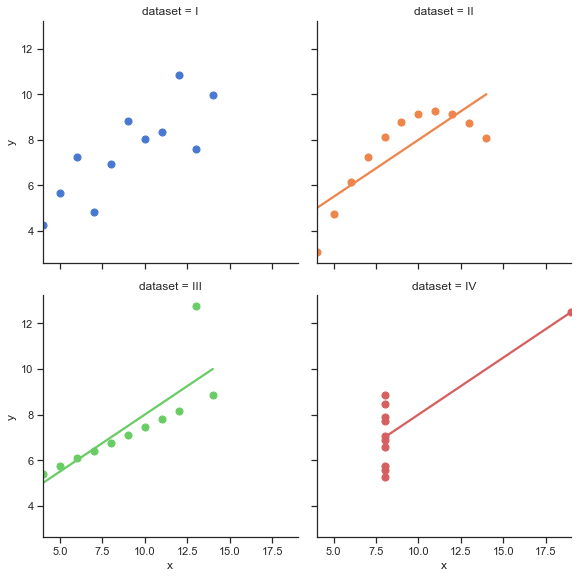

In [54]:
sns.set(style="ticks")
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Dados e Estatística
## Resgatando as variáveis

In [55]:
filmes.head()
# variável => filmes = pd.read_csv('../arquivos/movies.csv')

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
filmes.head(2) # mostra só os 2 primeiros elementos

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [57]:
notas.head()
# notas = pd.read_csv('../arquivos/ratings.csv')

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando os dois primeiros filmes

In [58]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


## Calculando a média

In [59]:
print(f'Notas médias do Toy Story: {notas_do_toy_story.nota.mean():.2f}') # usando f strings
# print('Notas do Toy Story: %.2f' % notas_do_toy_story.nota.mean()) # usando interpolação
print(f'Notas médias do Jumanji: {notas_do_jumanji.nota.mean():.2f}') # usando f strings

Notas médias do Toy Story: 3.92
Notas médias do Jumanji: 3.43


* a média não representa muitas coisas como por exemplo:
    * quantas pessoas odiaram ou amaram o filme
    * quantas pessoas deram nota 5, ou nota 1 por exemplo

## Calculando a mediana

In [60]:
print(f'Notas medianas do Toy Story: {notas_do_toy_story.nota.median():.2f}')
print(f'Notas medianas Jumanji: {notas_do_jumanji.nota.median():.2f}')

Notas medianas do Toy Story: 4.00
Notas medianas Jumanji: 3.50


* a mediana expressa apenas o valor de corte onde 50% está acima e 50% está abaixo
* novamente não apresenta muita informação
* tentam apenas representar o valor central do todo

## Utilizando o Numpy
* o Pandas pode, em algum momento rodar o Numpy por baixo dos panos

In [61]:
import numpy as np

### Criando um array com Numpy

In [62]:
print([2.5] * 10) # sem numpy
np.array([2.5] * 10) # com numpy

[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]


array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

### Juntando dois arrays

In [63]:
np.append(np.array([2.5] * 10), np.array([3.5] * 10))

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

### Comparando média e mediana com Numpy

In [64]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
# supondo que essas sejam as notas de um filme...
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
# e essas de um outro filme

In [65]:
print(filme1.mean(), filme2.mean()) # média com numpy
print(np.median(filme1), np.median(filme2)) # não é possível chamar a mediana com variável.median()

3.0 3.0
3.0 3.0


* a média e mediana tiveram o mesmo valor para os dois conjuntos de dados
* porém, sabemos que cada conjunto tem um comportamento complemente diferente do outro:
    * no primeiro as notas se aproximam muito de um valor central
    * no segundo os valores são muito mais distribuídos, extremos
* portanto, cada filme refletiu um comportamento diferente, que não foi possível ver com as funções

## Visualizando os dados
### Com Seaborn

<AxesSubplot:ylabel='Count'>

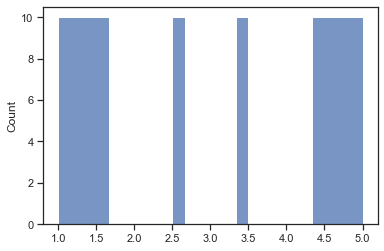

In [66]:
sns.histplot(filme1)
sns.histplot(filme2)

### Com Matplot

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

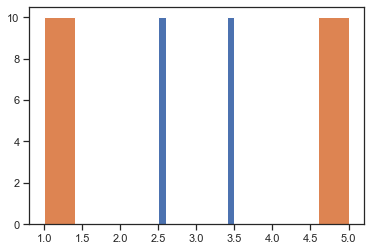

In [67]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x20f32053a00>,
 'caps': [<matplotlib.lines.Line2D at 0x20f31eb8130>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f2d70e2e0>,
 'medians': [<matplotlib.lines.Line2D at 0x20f31eb8a30>,
 'fliers': [<matplotlib.lines.Line2D at 0x20f3211f3d0>,
 'means': []}

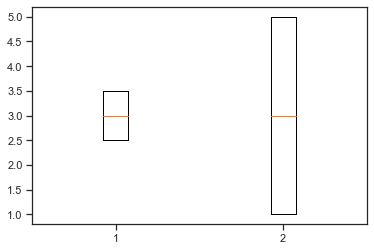

In [68]:
plt.boxplot([filme1, filme2]) # para ver mais de um conj de dados, passamos por um array

## Voltando aos filmes
### Boxplot com Seaborn

<AxesSubplot:xlabel='nota'>

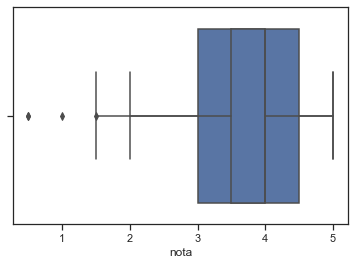

In [69]:
sns.boxplot(x=notas_do_toy_story.nota)
sns.boxplot(x=notas_do_jumanji.nota)

### Boxplot com Matplot

{'whiskers': [<matplotlib.lines.Line2D at 0x20f32219ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x20f322241c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f32219760>,
 'medians': [<matplotlib.lines.Line2D at 0x20f32224880>,
 'fliers': [<matplotlib.lines.Line2D at 0x20f32224be0>,
 'means': []}

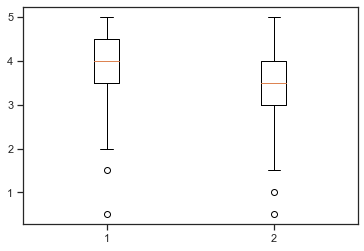

In [70]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

### Explorando os dados com Seaborn

* podemos explorar os dados mesmo quando não temos eles separados

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

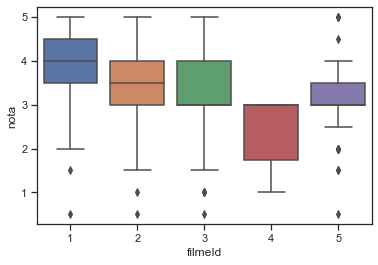

In [71]:
# sns.boxplot(x='filmeId', y='nota', data = notas) # nesse caso ele criaria um boxplot para cada filme
# para reduzir o nº de filmes, podemos passar uma query
sns.boxplot(x='filmeId', y='nota', data = notas.query('filmeId in [1, 2, 3, 4, 5]'))
# podemos passar valores da query em um array

## Dispersão de Dados e Desvio Padrão

### Dispersão de Dados

* Em estatística, dispersão de dados pode ser chamada de variabilidade ou espalhamento
* são dados estatísticos para mostrar uma determinada variação de dados
* com esses dados é possível obter a variância, o desvio padrão e a amplitude interquartil

### Desvio Padrão

* mostra o quanto os dados fogem de uma tendência central
* resume em um nº o quanto os dados estão desviando por padrão
* em inglês **standard deviation**
* buscando a documentação do pandas: pandas standard deviation => pandas.DataFrame.std
* buscando a documentação do numpy => numpy.std

### No Pandas

In [72]:
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114045 0.8817134921476455


### No Numpy

In [73]:
# utilizando as variáveis filme1 e filme2, criadas anteriormente
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


# Fontes de Dados
## Kaggle
https://www.kaggle.com
## Google Dataset Search
https://datasetsearch.research.google.com/